## Global Annual Population Growth (1951 - 2020)

### About Dataset

The dataset contains the total population and urban population for each year (1951 - 2020) as well as the population growth rate as a percentage. The dataset can be used to study population trends and understand how the global population has changed over time.

### Tabular data includes:

    year
    population
    yearly_growth_percentage
    yearly_growth
    pop_density_km2
    urban_population
    urban_population_percentage


In [310]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

### Data Frame

In [311]:
df = pd.read_csv('world-population.csv')
df.sample(5)

,year,population,yearly_growth_percentage,yearly_growth,pop_density_km2,urban_population,urban_population_percentage
44,1995,5744212979,1.43%,81062552,39,2575505235,45%
53,2004,6461159000,1.25%,79974000,43,3143045000,48%
11,1962,3150420795,1.89%,58577288,21,1088376703,35%
30,1981,4536996762,1.77%,78993248,30,1804215203,40%
9,1960,3034949748,1.86%,55373563,20,1023845517,34%


### Preprocessing

In [312]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   year                         70 non-null     int64 
 1   population                   70 non-null     int64 
 2   yearly_growth_percentage     70 non-null     object
 3   yearly_growth                70 non-null     int64 
 4   pop_density_km2              70 non-null     int64 
 5   urban_population             70 non-null     int64 
 6   urban_population_percentage  70 non-null     object
dtypes: int64(5), object(2)
memory usage: 4.0+ KB


In [313]:
# Find out the number of values which are not numeric
print(df['year'].astype(str).str.isnumeric().value_counts())
print(df['population'].astype(str).str.isnumeric().value_counts())
print(df['yearly_growth'].astype(str).str.isnumeric().value_counts())
print(df['yearly_growth_percentage'].astype(str).str.isnumeric().value_counts())
print(df['pop_density_km2'].astype(str).str.isnumeric().value_counts())

True    70
Name: year, dtype: int64
True    70
Name: population, dtype: int64
True    70
Name: yearly_growth, dtype: int64
False    70
Name: yearly_growth_percentage, dtype: int64
True    70
Name: pop_density_km2, dtype: int64


In [314]:
#remove "%" to make convert to number
def removePercentage(d):
      return float(d[:-1])/100
df['yearly_growth_percentage']= df['yearly_growth_percentage'].apply(removePercentage)
df['urban_population_percentage']= df['urban_population_percentage'].apply(removePercentage)
df

,year,population,yearly_growth_percentage,yearly_growth,pop_density_km2,urban_population,urban_population_percentage
0,1951,2584034261,0.0188,47603112,17,775067697,0.30
1,1952,2630861562,0.0181,46827301,18,799282533,0.30
2,1953,2677608960,0.0178,46747398,18,824289989,0.31
3,1954,2724846741,0.0176,47237781,18,850179106,0.31
4,1955,2773019936,0.0177,48173195,19,877008842,0.32
...,...,...,...,...,...,...,...
65,2016,7464022000,0.0114,84225000,50,4060653000,0.54
66,2017,7547859000,0.0112,83837000,51,4140189000,0.55
67,2018,7631091000,0.0110,83232000,51,4219817000,0.55
68,2019,7713468000,0.0108,82377000,52,4299439000,0.56


### Visualization

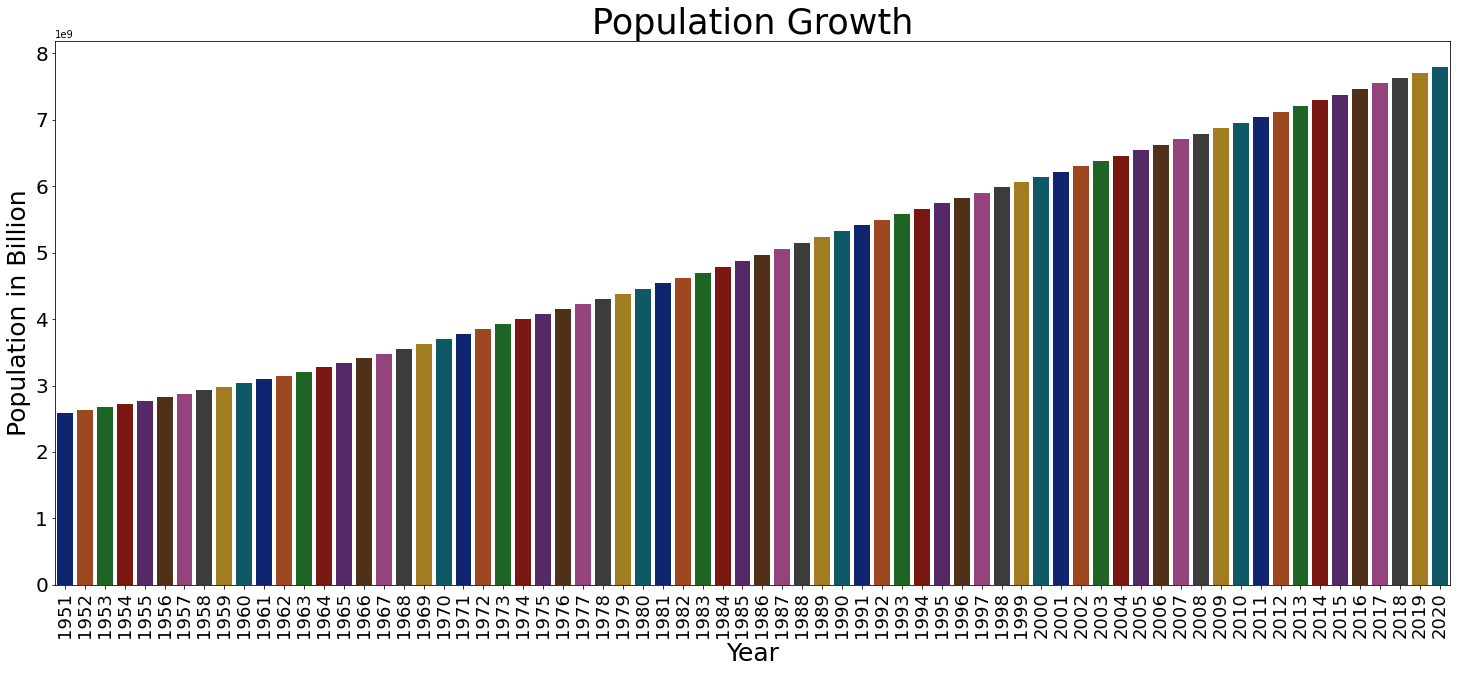

In [315]:
plt.rcParams['figure.figsize'] = (25, 10)
ax = sns.barplot(x = df['year'], y = df['population'],palette='dark')
ax.set_xlabel(xlabel = 'Year', fontsize = 25)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 25)
ax.set_title(label = 'Population Growth', fontsize = 35)
plt.xticks(rotation = 90,fontsize=18)
plt.yticks(fontsize=20)
plt.show()

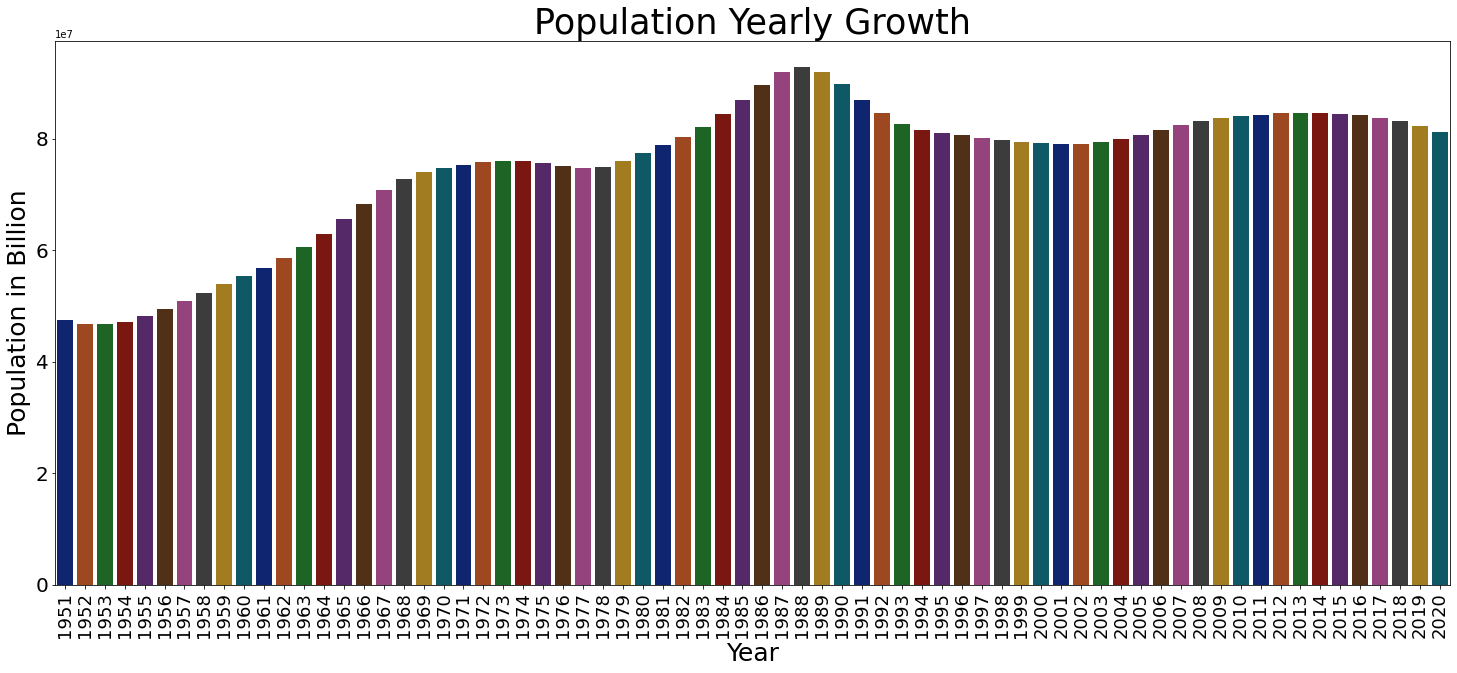

In [316]:
plt.rcParams['figure.figsize'] = (25, 10)
ax = sns.barplot(x = df['year'], y = df['yearly_growth'],palette='dark')
ax.set_xlabel(xlabel = 'Year', fontsize = 25)
ax.set_ylabel(ylabel = 'Population in Billion', fontsize = 25)
ax.set_title(label = 'Population Yearly Growth', fontsize = 35)
plt.xticks(rotation = 90,fontsize=18)
plt.yticks(fontsize=20)
plt.show()

### Descriptive Analytic

In [317]:
#Population average growth over the years in percentage
np.mean(df['yearly_growth_percentage'])*100

1.6164285714285715

### Predict Analytic
##### Why we use Linear Regression
As the population of a country can take any values and not some selected discrete values we realize that this is a regression problem and not a classification problem. Linear Regression is one of the most basic algorithms of Machine Learning. This algorithm lets us predict numerical data. Hence we use Linear Regression to solve this problem.

We normalize the data to scale. And to ease the prediction of growth rate with machine learning.

In [339]:
yp = df[['year','population']]
yp
x = yp.iloc[:, 0].values.reshape(-1, 1)
y = yp.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
predict_population = model.predict([[2024]])
y_pred

array([[8.48383794e+09]])

We create the model from the Linear regression library
And fit (train) our test data into the model

In [319]:
lm = LinearRegression()
lm.fit(x_train,y_train)# train
predictions = lm.predict(x_test)# predict
predictions

array([5.14118579e+09, 5.14118579e+09, 5.14118579e+09, 5.14118579e+09,
       5.14118579e+09, 5.14118579e+09, 5.14118579e+09, 5.14118579e+09,
       5.14118579e+09, 5.14118579e+09, 5.14118579e+09, 5.14118579e+09,
       5.14118579e+09, 5.14118579e+09, 5.14118579e+09, 5.14118579e+09,
       5.14118579e+09, 5.14118579e+09, 5.14118579e+09, 5.14118579e+09,
       5.14118579e+09])

Now to see the accuracy of our model we will use the tools of Mean Squared Error and Mean Absolute Error.

,year,population
0,1951,2584034261
1,1952,2630861562
2,1953,2677608960
3,1954,2724846741
4,1955,2773019936
...,...,...
65,2016,7464022000
66,2017,7547859000
67,2018,7631091000
68,2019,7713468000
